In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\Acer\Documents\Projek Starbuck\Data\starbucks_drinkMenu_expanded.csv"

df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5           

In [3]:
print(df.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [4]:
# ====== 3. Data Cleaning ======

# Bersihkan nama kolom (hapus spasi dan karakter aneh)
df.columns = (
    df.columns
    .str.strip()
    .str.replace('[^A-Za-z0-9_]+', '_', regex=True)
)
df.columns = df.columns.str.replace('_$', '', regex=True)

# Ganti 'varies' dengan NaN lalu ubah ke angka
if 'Caffeine_mg' in df.columns:
    df['Caffeine_mg'] = df['Caffeine_mg'].replace('varies', None)
    df['Caffeine_mg'] = pd.to_numeric(df['Caffeine_mg'], errors='coerce').fillna(0)
elif 'Caffeine_mg_' in df.columns:
    df['Caffeine_mg_'] = df['Caffeine_mg_'].replace('varies', None)
    df['Caffeine_mg_'] = pd.to_numeric(df['Caffeine_mg_'], errors='coerce').fillna(0)
    df = df.rename(columns={'Caffeine_mg_': 'Caffeine_mg'})

# Ganti NaN di seluruh dataframe
df = df.fillna(0)

# Ubah kolom numerik lain ke angka jika memungkinkan
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except Exception:
        pass

print("\n✅ Data cleaned successfully!")
print(df.dtypes)



✅ Data cleaned successfully!
Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
Total_Fat_g               object
Trans_Fat_g              float64
Saturated_Fat_g          float64
Sodium_mg                  int64
Total_Carbohydrates_g      int64
Cholesterol_mg             int64
Dietary_Fibre_g            int64
Sugars_g                   int64
Protein_g                float64
Vitamin_A_DV              object
Vitamin_C_DV              object
Calcium_DV                object
Iron_DV                   object
Caffeine_mg              float64
dtype: object


C:\Users\Acer\AppData\Local\Temp\ipykernel_24032\3658278416.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [15]:
# ====== 4. Create SQLite Database ======
conn = sqlite3.connect("starbucks.db")
df.to_sql("menu", conn, if_exists="replace", index=False)
print("\n☕ Data stored in SQLite database: 'starbucks.db'")



☕ Data stored in SQLite database: 'starbucks.db'


In [24]:
sizes = ['Short', 'Tall', 'Grande', 'Venti']

# Buat dictionary untuk menyimpan dataframe tiap ukuran
dataframes = {}

for size in sizes:
    query = f"""
    SELECT 
        Beverage, 
        Beverage_category, 
        Caffeine_mg
    FROM menu
    WHERE Beverage_prep LIKE '%{size}%'
          AND Caffeine_mg IS NOT NULL
    ORDER BY Caffeine_mg DESC
    LIMIT 5;
    """

    df_size = pd.read_sql_query(query, conn)
    
    # Simpan ke dictionary
    dataframes[size] = df_size
    
    # Tampilkan tabel
    print(f"\n☕ Top 5 Drinks with Highest Caffeine ({size} Size):")
    display(df_size)



☕ Top 5 Drinks with Highest Caffeine (Short Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,175.0
1,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,85.0
2,Caffè Latte,Classic Espresso Drinks,75.0
3,Vanilla Latte (Or Other Flavoured Latte),Classic Espresso Drinks,75.0
4,Caffè Americano,Classic Espresso Drinks,75.0



☕ Top 5 Drinks with Highest Caffeine (Tall Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,260.0
1,Shaken Iced Tazo® Tea (With Classic Syrup),Shaken Iced Beverages,170.0
2,Caffè Americano,Classic Espresso Drinks,150.0
3,Mocha (Without Whipped Cream),Frappuccino® Blended Coffee,130.0
4,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,120.0



☕ Top 5 Drinks with Highest Caffeine (Grande Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,330.0
1,Caffè Americano,Classic Espresso Drinks,225.0
2,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,175.0
3,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,165.0
4,Caffè Latte,Classic Espresso Drinks,150.0



☕ Top 5 Drinks with Highest Caffeine (Venti Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,410.0
1,Caffè Americano,Classic Espresso Drinks,300.0
2,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,235.0
3,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,180.0
4,Java Chip,Frappuccino® Light Blended Coffee,165.0


C:\Users\Acer\AppData\Local\Temp\ipykernel_24032\2564053791.py:29: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 0.85, 0.95])
C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


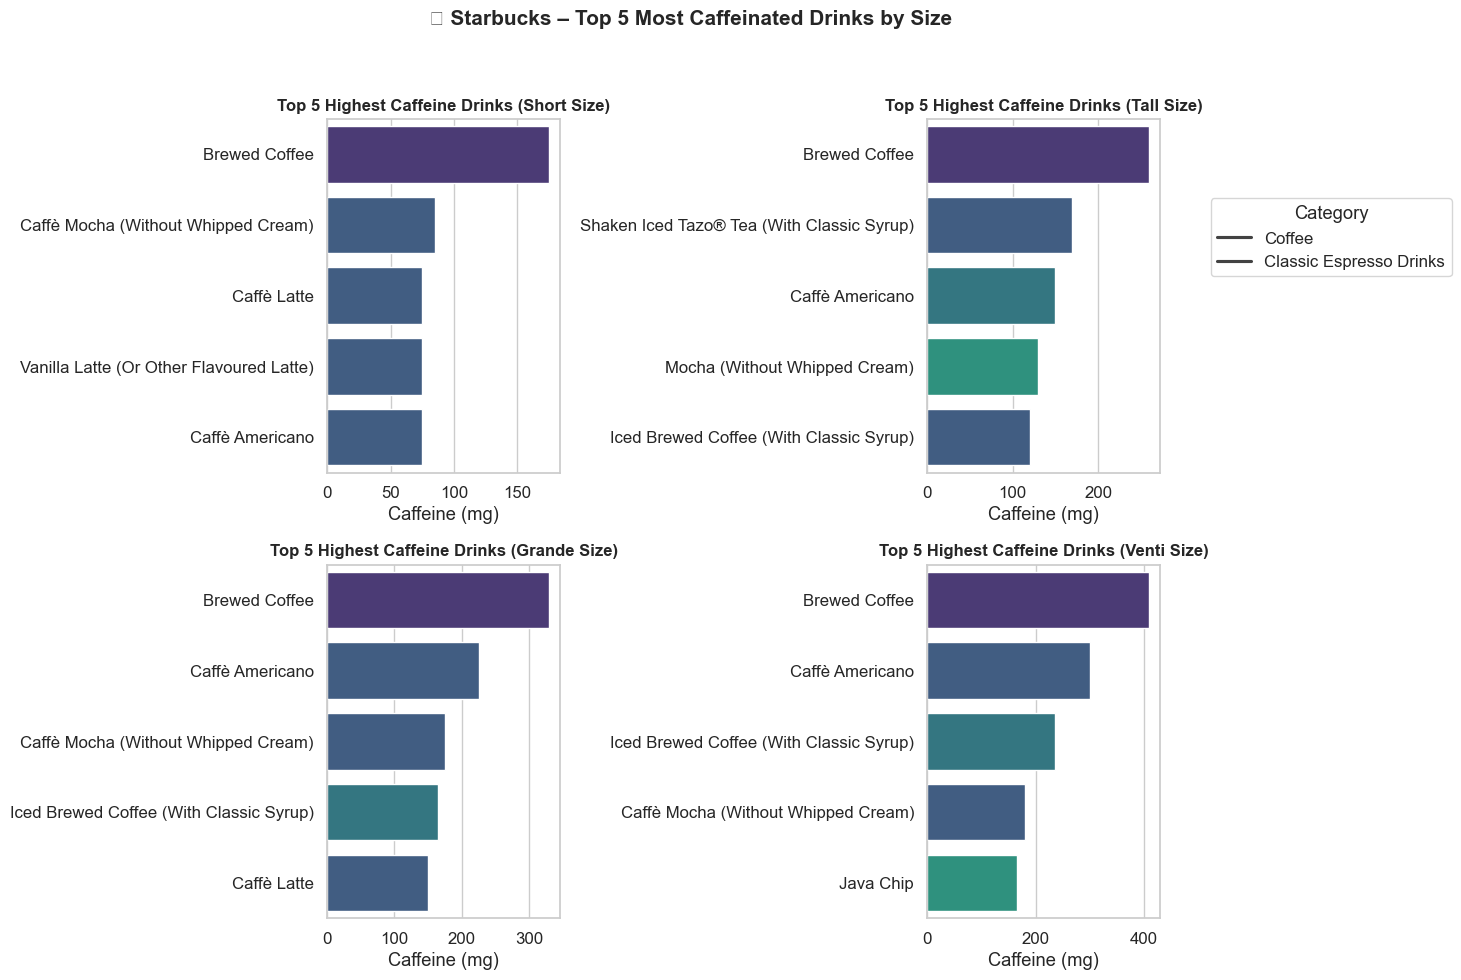

In [25]:
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, size in enumerate(dataframes.keys()):
    df_size = dataframes[size]
    
    sns.barplot(
        data=df_size,
        x='Caffeine_mg',
        y='Beverage',
        hue='Beverage_category',
        dodge=False,
        ax=axes[i]
    )
    
    axes[i].set_title(f'Top 5 Highest Caffeine Drinks ({size} Size)', fontsize=12, weight='bold')
    axes[i].set_xlabel('Caffeine (mg)')
    axes[i].set_ylabel('')
    axes[i].legend().set_visible(False)

fig.legend(
    dataframes['Short']['Beverage_category'].unique(),
    title='Category',
    bbox_to_anchor=(1.05, 0.8)
)
plt.suptitle('☕ Starbucks – Top 5 Most Caffeinated Drinks by Size', fontsize=15, weight='bold')
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

In [26]:
query2 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Calories), 2) AS Avg_Calories
FROM menu
GROUP BY Beverage_category
ORDER BY Avg_Calories DESC;
"""

avg_calories = pd.read_sql_query(query2, conn)

print("🔥 Average Calories by Beverage Category:")
print(avg_calories)

🔥 Average Calories by Beverage Category:
                   Beverage_category  Avg_Calories
0                          Smoothies        282.22
1        Frappuccino® Blended Coffee        276.94
2          Signature Espresso Drinks        250.00
3         Frappuccino® Blended Crème        233.08
4                   Tazo® Tea Drinks        177.31
5  Frappuccino® Light Blended Coffee        162.50
6            Classic Espresso Drinks        140.17
7              Shaken Iced Beverages        114.44
8                             Coffee          4.25


In [28]:
query3 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Caffeine_mg), 2) AS Avg_Caffeine
FROM menu
WHERE Caffeine_mg IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Caffeine DESC;
"""

avg_caffeine = pd.read_sql_query(query3, conn)

print("Average Caffeine by Beverage Category:")
print(avg_caffeine)

Average Caffeine by Beverage Category:
                   Beverage_category  Avg_Caffeine
0                             Coffee        293.75
1            Classic Espresso Drinks        122.07
2        Frappuccino® Blended Coffee        101.81
3  Frappuccino® Light Blended Coffee         99.58
4              Shaken Iced Beverages         93.06
5          Signature Espresso Drinks         73.88
6                   Tazo® Tea Drinks         34.90
7                          Smoothies          5.00
8         Frappuccino® Blended Crème          0.00


In [29]:
query4 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Total_Fat_g), 2) AS Avg_Total_Fat_g
FROM menu
WHERE Total_Fat_g != '' AND Total_Fat_g IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Total_Fat_g DESC;
"""

avg_fat = pd.read_sql_query(query4, conn)

print("Average Total Fat by Beverage Category:")
print(avg_fat)

Average Total Fat by Beverage Category:
                   Beverage_category  Avg_Total_Fat_g
0          Signature Espresso Drinks             5.28
1            Classic Espresso Drinks             3.13
2        Frappuccino® Blended Coffee             3.00
3                   Tazo® Tea Drinks             2.54
4                          Smoothies             2.33
5         Frappuccino® Blended Crème             1.94
6  Frappuccino® Light Blended Coffee             1.26
7              Shaken Iced Beverages             0.47
8                             Coffee             0.10


In [30]:
# Query: Rata-rata Sugar (g) per kategori minuman
query5 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Sugars_g), 2) AS Avg_Sugar_g
FROM menu
WHERE Sugars_g != '' AND Sugars_g IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Sugar_g DESC;
"""

avg_sugar = pd.read_sql_query(query5, conn)

print("Average Sugar by Beverage Category:")
print(avg_sugar)


Average Sugar by Beverage Category:
                   Beverage_category  Avg_Sugar_g
0        Frappuccino® Blended Coffee        57.08
1         Frappuccino® Blended Crème        48.46
2          Signature Espresso Drinks        38.60
3                          Smoothies        36.78
4  Frappuccino® Light Blended Coffee        32.42
5                   Tazo® Tea Drinks        30.31
6              Shaken Iced Beverages        26.00
7            Classic Espresso Drinks        16.97
8                             Coffee         0.00


In [48]:
query_healthy_clean = """
SELECT Beverage, Beverage_category,
       MIN(Calories) AS Calories,
       MIN(Sugars_g) AS Sugars_g,
       MIN(Total_Fat_g) AS Total_Fat_g
FROM menu
GROUP BY Beverage, Beverage_category
ORDER BY Calories ASC, Sugars_g ASC, Total_Fat_g ASC
LIMIT 10;
"""

healthy_drinks_clean = pd.read_sql_query(query_healthy_clean, conn)

print("Top 10 Healthiest Drinks — Cleaned (1 row per beverage):")
display(healthy_drinks_clean)



Top 10 Healthiest Drinks — Cleaned (1 row per beverage):


,Beverage,Beverage_category,Calories,Sugars_g,Total_Fat_g
0,Tazo® Tea,Tazo® Tea Drinks,0,0,0
1,Brewed Coffee,Coffee,3,0,0.1
2,Caffè Americano,Classic Espresso Drinks,5,0,0
3,Espresso,Classic Espresso Drinks,5,0,0
4,Cappuccino,Classic Espresso Drinks,50,3,0.1
5,Skinny Latte (Any Flavour),Classic Espresso Drinks,60,8,0.1
6,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,60,15,0
7,Shaken Iced Tazo® Tea (With Classic Syrup),Shaken Iced Beverages,60,15,0
8,Caffè Latte,Classic Espresso Drinks,70,4,0.1
9,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Tazo® Tea Drinks,80,13,0.1


In [ ]:
print(df_vis.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat_g', 'Trans_Fat_g', 'Saturated_Fat_g', 'Sodium_mg',
       'Total_Carbohydrates_g', 'Cholesterol_mg', 'Dietary_Fibre_g',
       'Sugars_g', 'Protein_g', 'Vitamin_A_DV', 'Vitamin_C_DV', 'Calcium_DV',
       'Iron_DV', 'Caffeine_mg'],
      dtype='object')


C:\Users\Acer\AppData\Local\Temp\ipykernel_24032\437715172.py:32: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


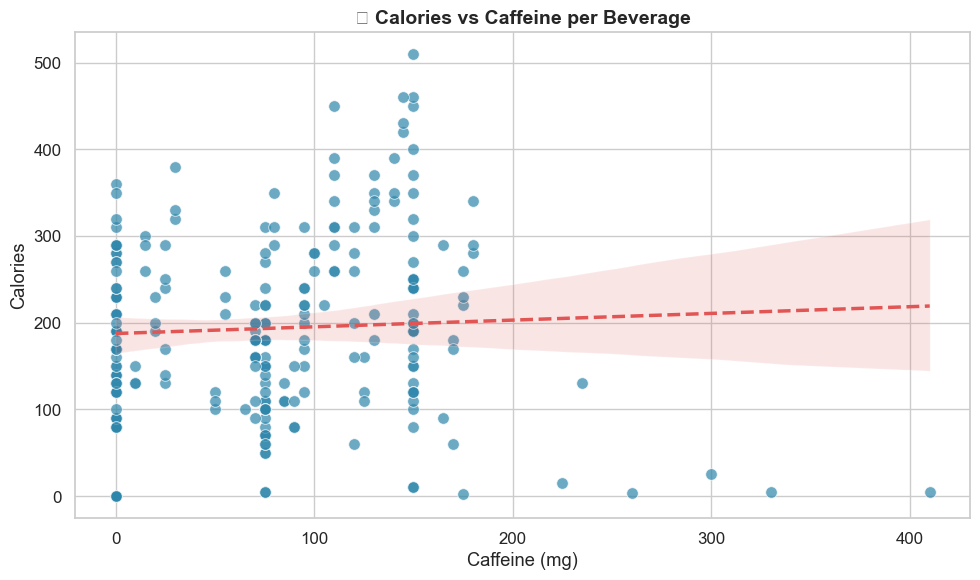

In [47]:
# Pastikan kolom numerik
df_vis['Calories'] = pd.to_numeric(df_vis['Calories'], errors='coerce')
df_vis['Caffeine_mg'] = pd.to_numeric(df_vis['Caffeine_mg'], errors='coerce')

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(10,6))

# Scatter plot dengan warna berbeda
scatter = sns.scatterplot(
    data=df_vis,
    x='Caffeine_mg',
    y='Calories',
    alpha=0.7,
    color='#2E86AB',  # Biru muda yang kontras
    s=70  # Ukuran titik
)

# Garis tren dengan warna kontras
sns.regplot(
    data=df_vis,
    x='Caffeine_mg',
    y='Calories',
    scatter=False,
    line_kws={'color': '#E15554', 'linewidth': 2.5, 'linestyle': '--'},  # Merah coral
    ci=95
)

plt.title('☕ Calories vs Caffeine per Beverage', fontsize=14, weight='bold')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()